#  Про типы величин, факторы, векторы и графику, создание функций

## Типы величин 

см например <http://baguzin.ru/wp/tipy-dannyh>

или книгу <https://cran.r-project.org/doc/contrib/Shipunov-rbook.pdf>

* Логические (True, False)


* Количественные (числовые)
    - непрерывные (Сколько метров?)
    - дискретные  (Сколько штук?)


* Категорийные  (используются названия категорий)
    - номинальные (порядок неважен) Пример: Операционная система (Windows, Linux, MacOS)
    - порядковые  (порядок важен)   Пример: Качество обслужевания: (возмутительно<плохо<средне<хорошо<превосходно)

## Логические

In [2]:
a=c(TRUE,T,F,FALSE)
cat("  вектор a:",a,"\n", sep="\t") # "\n" -- new line character ; \t - табуляция
cat("отрицание !a" , !a,"\n", sep="\t") # ! - отрицание
b=c(T,F,T,F)
cat(" вектор b:",b,"\n", sep="\t")
cat("  или a|b" , a|b,"\n", sep="\t") # символ "pipe" вертикальная палка - логическое или
cat("    и a&b" , a&b,"\n", sep="\t") # символ & "ampersand"  - логическое и


  вектор a:	TRUE	TRUE	FALSE	FALSE	
отрицание !a	FALSE	FALSE	TRUE	TRUE	
 вектор b:	TRUE	FALSE	TRUE	FALSE	
  или a|b	TRUE	TRUE	TRUE	FALSE	
    и a&b	TRUE	FALSE	FALSE	FALSE	


In [3]:
as.integer(a)

[1] 1 1 0 0

In [4]:
sum(a)

[1] 2

### Таблица данных для примеров

In [7]:
library(tidyverse)

student_tab = tibble(
        name=paste0("student",1:6),
        is.married = c(T,T,F,F,T,T),
        is.economist = c(T,F,T,T,F,F) ,
        team = c("Динамо","Спартак","Зенит", "Спартак","ЦСКА","ЦСКА"),
        performance = c("неуд","отл","отл","удовл","хор","хор"),
        height=c(159,200,173,188,168,190.5))
        
student_tab

name,is.married,is.economist,team,performance,height
student1,TRUE,TRUE,Динамо,неуд,159.0
student2,TRUE,FALSE,Спартак,отл,200.0
student3,FALSE,TRUE,Зенит,отл,173.0
student4,FALSE,TRUE,Спартак,удовл,188.0
student5,TRUE,FALSE,ЦСКА,хор,168.0
student6,TRUE,FALSE,ЦСКА,хор,190.5


### Пример 1 

Почситать в таблице `student_tab` количество неженатых экономистов и вывести их имена

table(v1,v2) - contingency table. Таблица встречаемости различных сочетаний значений величин v1 и v2

table(v1) - показывает, сколько раз встречается то или иное значение

In [8]:
(is.econ.table  <- table(student_tab$is.economist))


FALSE  TRUE 
    3     3 

In [9]:
str(is.econ.table)

 'table' int [1:2(1d)] 3 3
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:2] "FALSE" "TRUE"


In [10]:
is.econ.table["FALSE"]

FALSE 
    3

In [11]:
names(is.econ.table)

[1] "FALSE" "TRUE"

In [12]:
(stud_2d_table <- table(student_tab$is.married, student_tab$is.economist))

       
        FALSE TRUE
  FALSE     0    2
  TRUE      3    1

In [13]:
colnames(stud_2d_table)

[1] "FALSE" "TRUE"

In [14]:
rownames(stud_2d_table)

[1] "FALSE" "TRUE"

In [15]:
sum(!student_tab$is.married&student_tab$is.economist) # количество как сумма единиц

[1] 2

имена этих студентов узнаем, подставив булевский индекс в качестве номеров строк data.frame

In [16]:
student_tab[!student_tab$is.married&student_tab$is.economist , ]

name,is.married,is.economist,team,performance,height
student3,FALSE,TRUE,Зенит,отл,173
student4,FALSE,TRUE,Спартак,удовл,188


## Категорийные (номинальная шкала)

In [17]:
mode(student_tab$team)

[1] "character"

In [18]:
table(student_tab$team)


 Динамо   Зенит Спартак    ЦСКА 
      1       1       2       2 

In [19]:
mode(student_tab$team)

[1] "character"

In [20]:
summary(student_tab$team)

   Length     Class      Mode 
        6 character character 

In [21]:
student_tab$team  <-  factor(student_tab$team )

In [22]:
summary(student_tab$team)

Динамо   Зенит Спартак    ЦСКА 
      1       1       2       2

In [23]:
levels(student_tab$team)

[1] "Динамо"  "Зенит"   "Спартак" "ЦСКА"

In [24]:
as.integer(student_tab$team)

[1] 1 3 2 3 4 4

In [25]:
levels(student_tab$team)  <-  c("ФК Динамо", "ФК Зенит", "ФК Спартак", "Цетральный Спорт Клуб Армии")

In [26]:
student_tab

name,is.married,is.economist,team,performance,height
student1,TRUE,TRUE,ФК Динамо,неуд,159.0
student2,TRUE,FALSE,ФК Спартак,отл,200.0
student3,FALSE,TRUE,ФК Зенит,отл,173.0
student4,FALSE,TRUE,ФК Спартак,удовл,188.0
student5,TRUE,FALSE,Цетральный Спорт Клуб Армии,хор,168.0
student6,TRUE,FALSE,Цетральный Спорт Клуб Армии,хор,190.5


In [27]:
summary(student_tab$team)

ФК Динамо                    ФК Зенит 
                          1                           1 
                 ФК Спартак Цетральный Спорт Клуб Армии 
                          2                           2

In [28]:
student_tab$team[1]<student_tab$team[2] # неупорядоченный factor

Warning message in Ops.factor(student_tab$team[1], student_tab$team[2]):
“‘<’ not meaningful for factors”

[1] NA

## Категорийные величины(порядковая шкала)

In [29]:
student_tab$performance  <-  factor(student_tab$performance  , ordered = T, levels=c("неуд","удовл", "хор", "отл"))

In [30]:
student_tab$performance[1]  < student_tab$performance[2]

[1] TRUE

In [31]:
levels(student_tab$performance)=c("неудовлетворительно", "удовлетворительно", "хорошо","отлично")

In [32]:
student_tab$performance

[1] неудовлетворительно отлично             отлично            
[4] удовлетворительно   хорошо              хорошо             
Levels: неудовлетворительно < удовлетворительно < хорошо < отлично

In [33]:
student_tab[student_tab$performance>"удовлетворительно",]

name,is.married,is.economist,team,performance,height
student2,TRUE,FALSE,ФК Спартак,отлично,200.0
student3,FALSE,TRUE,ФК Зенит,отлично,173.0
student5,TRUE,FALSE,Цетральный Спорт Клуб Армии,хорошо,168.0
student6,TRUE,FALSE,Цетральный Спорт Клуб Армии,хорошо,190.5


In [34]:
table(student_tab$team,student_tab$performance)

                             
                              неудовлетворительно удовлетворительно хорошо
  ФК Динамо                                     1                 0      0
  ФК Зенит                                      0                 0      0
  ФК Спартак                                    0                 1      0
  Цетральный Спорт Клуб Армии                   0                 0      2
                             
                              отлично
  ФК Динамо                         0
  ФК Зенит                          1
  ФК Спартак                        1
  Цетральный Спорт Клуб Армии       0

In [35]:
student_tab$team <-  factor(student_tab$team)

?legend

In [36]:
str(student_tab$team)

 Factor w/ 4 levels "ФК Динамо","ФК Зенит",..: 1 3 2 3 4 4


## Определяем нужные функции

In [37]:
# m, v --  формальные параметры 
my_density  <- function (m,v) {
    "любое выражение 1"
    "любое выражение 2"
    m/v  # возвращаемое значение
}
    
m_aurum  <- 57.900
v_aurum  <- 0.003
m_ferrum  <-  7800
v_ferrum  <- 1

cat("плотность кг/m^3")
paste(c("золото","железо"),":",
      c(my_density(m_aurum,v_aurum),
        my_density(m_ferrum,v_ferrum)
       ))
    
# m_aurum,v_aurum     -- фактические параметры 

плотность кг/m^3

[1] "золото : 19300" "железо : 7800"

In [38]:
args(my_density)

function (m, v) 
NULL

In [39]:
print(my_density)

function (m,v) {
    "любое выражение 1"
    "любое выражение 2"
    m/v  # возвращаемое значение
}
<bytecode: 0x7fc378b1fb10>


### Задаем размеры графиков

In [40]:
# размеры рисунков в Jupyter
library(repr)

options(repr.plot.width = 7)
options(repr.plot.height = 5)


Warning message:
“package ‘repr’ was built under R version 3.4.4”

## Из кирилицы в латиницу. Определяем ф-ю `as.volopuk(строка)`

In [41]:
stringi::stri_trans_general("Москва, метро Университет", "cyrillic-latin; nfd; [:nonspacing mark:] remove; nfc")

[1] "Moskva, metro Universitet"

In [42]:
as.volopuk  <-  function (str) 
      stringi::stri_trans_general(str, "cyrillic-latin; nfd; [:nonspacing mark:] remove; nfc")

In [43]:
as.volopuk("Москва, метро Университет")

[1] "Moskva, metro Universitet"

In [44]:
student_tab$team_lat  <- as.volopuk(student_tab$team)

In [45]:
summary(student_tab$team_lat)

   Length     Class      Mode 
        6 character character 

In [46]:
student_tab$team_lat[student_tab$team=="Цетральный Спорт Клуб Армии"]  <- "CSKA"

In [47]:
student_tab$team_lat

[1] "FK Dinamo"  "FK Spartak" "FK Zenit"   "FK Spartak" "CSKA"      
[6] "CSKA"

Русские буквы могут вызывать большое число предупреждений (warnings) в графика ggplot2

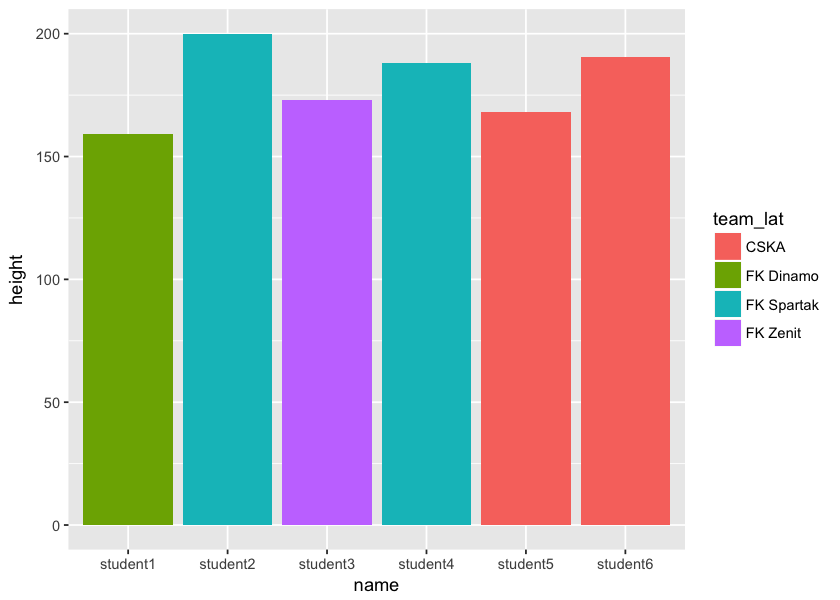

In [48]:
ggplot(data=student_tab)+
  geom_bar(mapping=aes(name,height,fill=team_lat),stat="identity")

В geom_bar() по умолчанию аргумент `stat = "count"`:

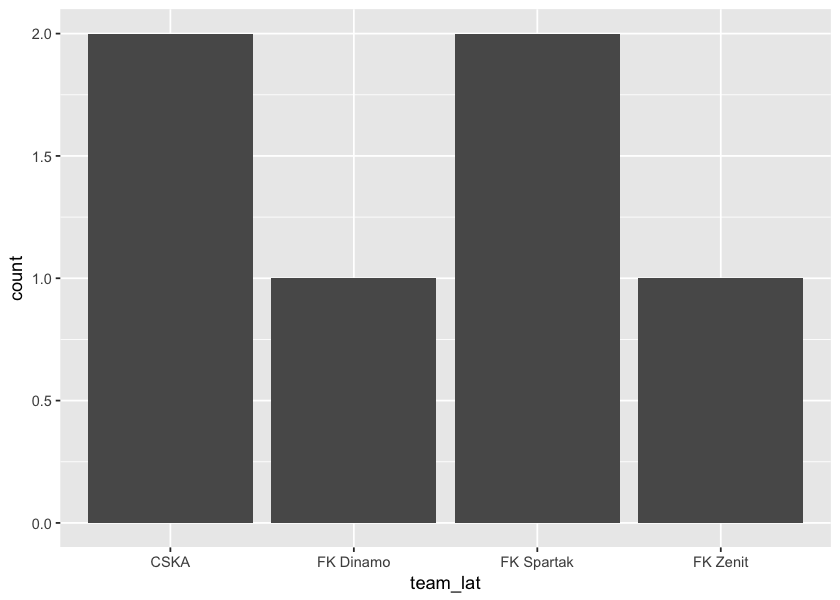

In [49]:
ggplot(data=student_tab)+geom_bar(mapping=aes(team_lat))

## Функция переупорядочиванияуровней фактора по количеству значений

```r
?geom_bar
...
# To change plot order of bars, change levels in underlying factor
reorder_size <- function(x) {
  factor(x, levels = names(sort(table(x))))
}  
```

In [50]:
summary(student_tab$team_lat)

   Length     Class      Mode 
        6 character character 

In [51]:
str(student_tab$team_lat)

 chr [1:6] "FK Dinamo" "FK Spartak" "FK Zenit" "FK Spartak" "CSKA" "CSKA"


In [52]:
reorder_size <- function(x) 
  factor(x, levels = names(sort(table(x))))

In [53]:
names(table(student_tab$team_lat))

[1] "CSKA"       "FK Dinamo"  "FK Spartak" "FK Zenit"

In [54]:
names(sort(table(student_tab$team_lat)))

[1] "FK Dinamo"  "FK Zenit"   "CSKA"       "FK Spartak"

In [55]:
str(reorder_size(student_tab$team_lat))

 Factor w/ 4 levels "FK Dinamo","FK Zenit",..: 1 4 2 4 3 3


In [56]:
reverse_reorder_size <- function(x) 
  factor(x, levels = names(sort(table(x),decreasing =T)))

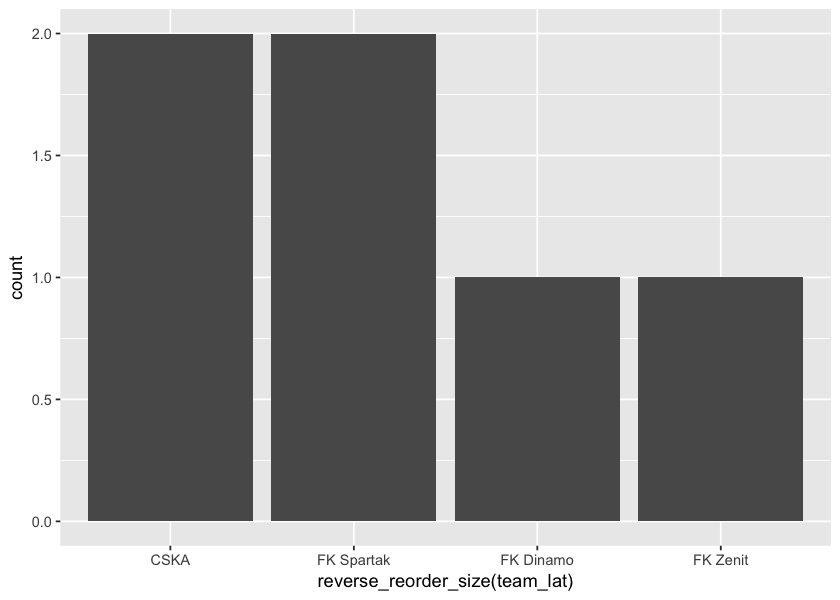

In [57]:
ggplot(data=student_tab)+geom_bar(mapping=aes(reverse_reorder_size(team_lat)))

# Базовая графика

* plot()
* pieplot()

In [58]:
student_tab$team_lat = factor(student_tab$team_lat)

In [59]:
levels(student_tab$team_lat)

[1] "CSKA"       "FK Dinamo"  "FK Spartak" "FK Zenit"

In [60]:
str(student_tab$team_lat)

 Factor w/ 4 levels "CSKA","FK Dinamo",..: 2 3 4 3 1 1


 Factor w/ 4 levels "CSKA","FK Dinamo",..: 1 2 3 4


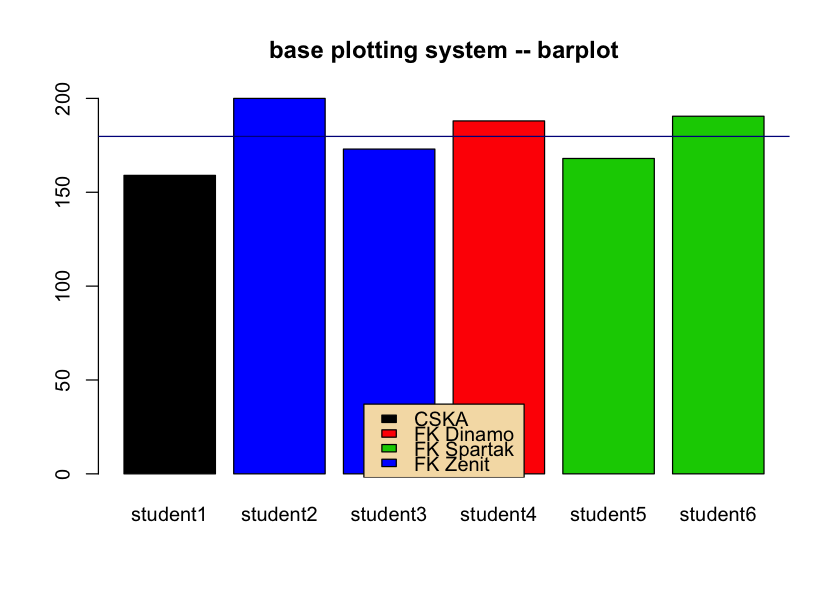

In [61]:

barplot(height = student_tab$height, 
        names.arg = student_tab$name,
        col=student_tab$performance,
       beside=T
        )
uni <- sort(unique(student_tab$team_lat,drop = T))
str(uni)
title(    main="base plotting system -- barplot")
abline(h=mean(student_tab$height), col="dark blue")
legend("bottom", legend=levels(uni),
       fill=1:length(uni),bg="wheat")


# ggplot 2 -- Grammar of Graphics version 2


[заметка про ресурсы](https://www.evernote.com/l/AQI-xamTIU5KV5d9V_-0Hae23ubRigV_0XQ)

## Grammar of Graphics

- Layers
    * data
    * AESthetic data mapping 
    * stat
    * geom
    * position ajustment
- Other    
    * coordinate system
    * scales 
    * faceting
- Themes

In [62]:
myPlot <-ggplot(data=ToothGrowth, aes(x=dose, y=len, col=supp))

In [63]:
summary(myPlot)

data: len, supp, dose [60x3]
mapping:  x = dose, y = len, colour = supp
faceting: <ggproto object: Class FacetNull, Facet>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map: function
    map_data: function
    params: list
    render_back: function
    render_front: function
    render_panels: function
    setup_data: function
    setup_params: function
    shrink: TRUE
    train: function
    train_positions: function
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet>


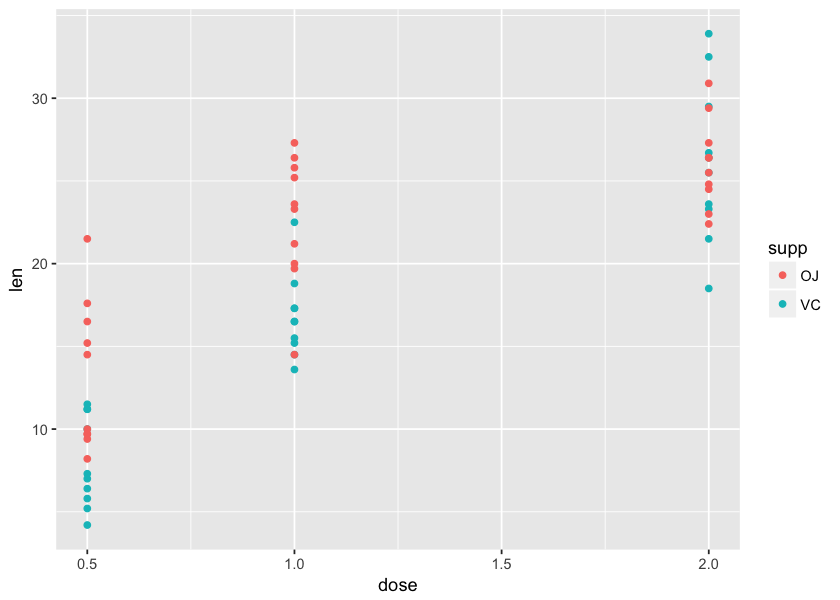

In [64]:
myPlot+geom_point()

In [65]:
myNewPlot <- myPlot +geom_point()
summary(myNewPlot)

data: len, supp, dose [60x3]
mapping:  x = dose, y = len, colour = supp
faceting: <ggproto object: Class FacetNull, Facet>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map: function
    map_data: function
    params: list
    render_back: function
    render_front: function
    render_panels: function
    setup_data: function
    setup_params: function
    shrink: TRUE
    train: function
    train_positions: function
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet>
-----------------------------------
geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 



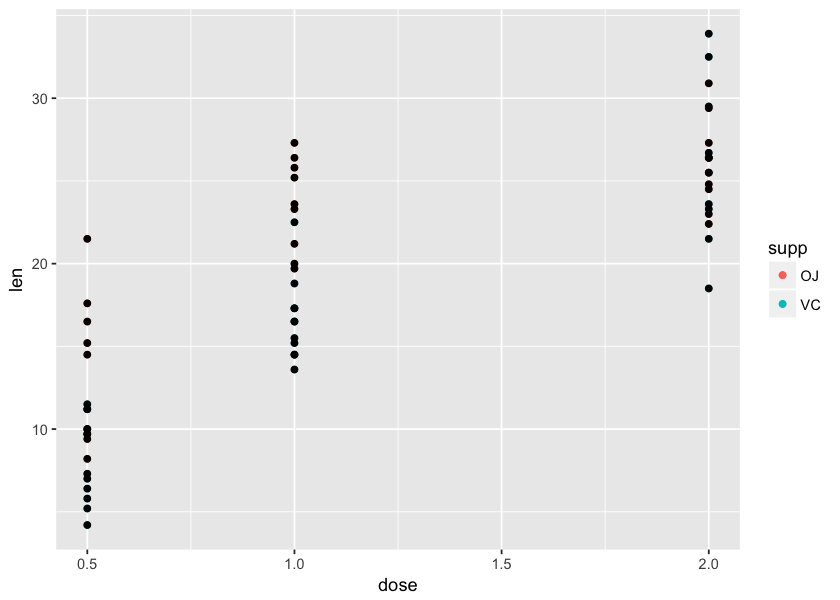

In [66]:

myNewPlot + geom_point(aes(colour=NULL))

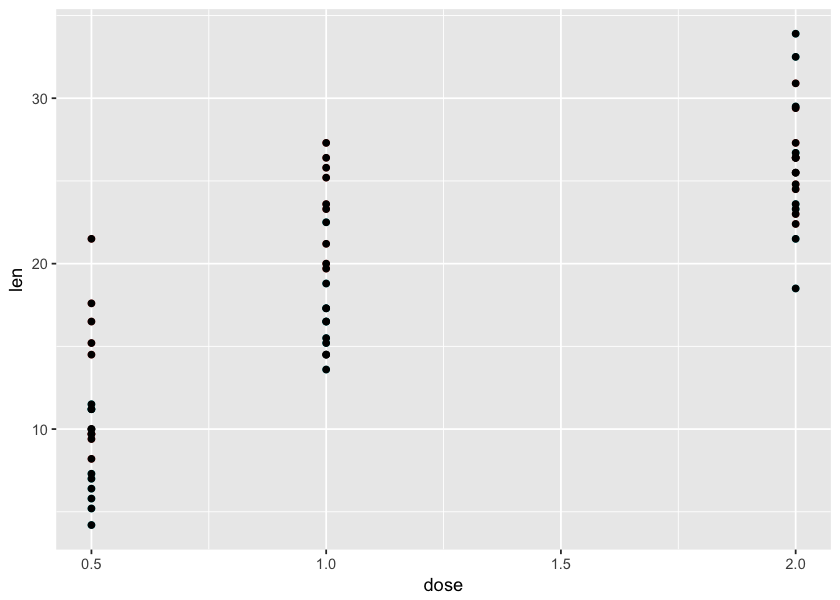

In [67]:
myNewPlot + geom_point(aes(col=NULL)) +

theme(legend.position="none")

In [68]:
country.code <- 'de'  # use yours
url.pattern <- 'https://'  # use http if you want
repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

In [69]:
# install.packages("ggplot2movies")

In [70]:
library(ggplot2movies)

In [71]:
d1 <-data.frame(movies[movies$Action==1, c("budget", "Short",
"year")])
d1$Type <- "Action"
d2 <-data.frame(movies[movies$Animation==1, c("budget", "Short",
"year")])
d2$Type <- "Animation"
d3 <-data.frame(movies[movies$Comedy==1, c("budget", "Short",
"year")])
d3$Type <- "Comedy"
d4 <-data.frame(movies[movies$Drama==1, c("budget", "Short",
"year")])
d4$Type <- "Drama"
d5 <-data.frame(movies[movies$Documentary==1, c("budget", "Short",
"year")])
d5$Type <- "Documentary"
d6 <-data.frame(movies[movies$Romance==1, c("budget", "Short",
"year")])
d6$Type <- "Romance"
myMovieData <- rbind(d1, d2, d3, d4, d5, d6)
names(myMovieData) <- c("Budget", "Short", "Year", "Type" )

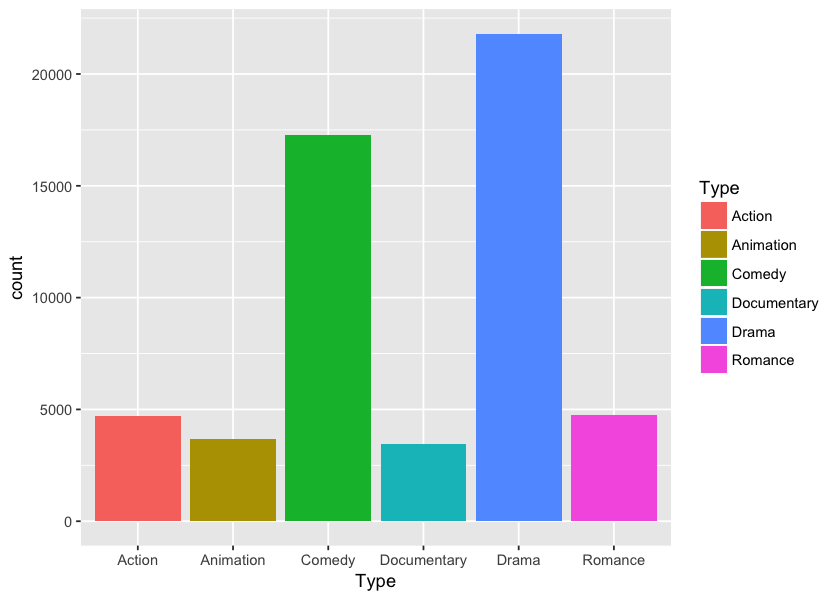

In [72]:
qplot(Type, data=myMovieData , geom="bar", fill=Type)

?qplot

Warning message:
“`position` is deprecated”

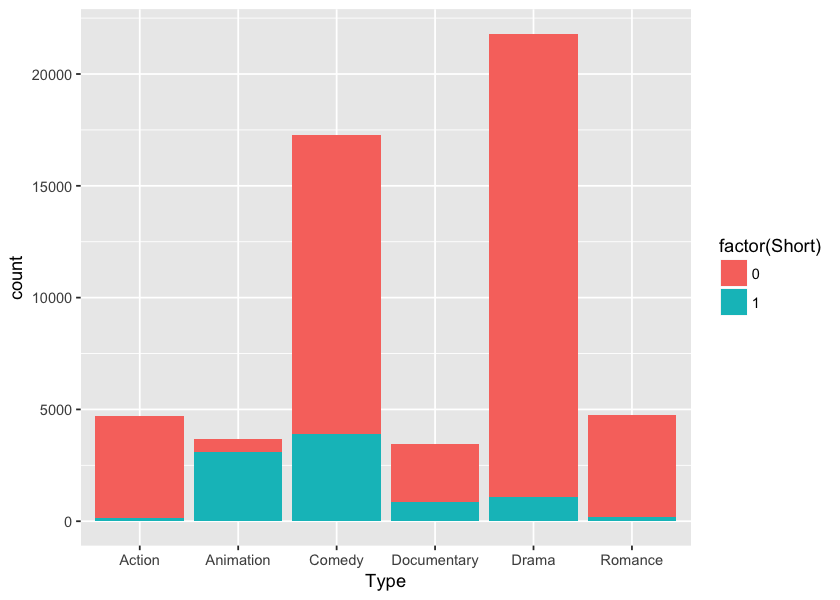

In [73]:
qplot(Type, data=myMovieData, geom="bar", fill=factor(Short),
position="dodge")

In [74]:
summary(myMovieData$Budget)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.00e+00 6.50e+05 5.00e+06 1.66e+07 2.00e+07 2.00e+08    49699 

Для многих фильмов Budget == NA (information is Not Available)

В summary --> 49699 NA



In [75]:
quantile(myMovieData$Budget,na.rm=T)

0%     25%     50%     75%    100% 
0.0e+00 6.5e+05 5.0e+06 2.0e+07 2.0e+08

Warning message:
“Removed 49699 rows containing non-finite values (stat_boxplot).”

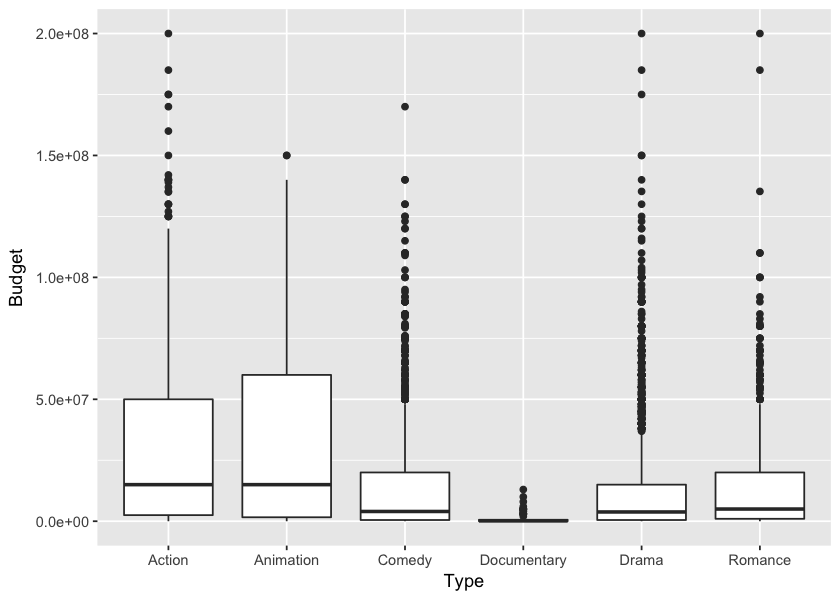

In [76]:
qplot(Type, Budget, data=myMovieData, geom="boxplot") 

Удаляем строки, в которых Budget==NA

In [77]:
nrow(myMovieData) # сколько строк в myMovieData
nrow(na.omit(myMovieData)) # сколько строк в myMovieData со всеми полями заполненными значениями
nrow(myMovieData[!is.na(myMovieData$Budget),]) # сколько строк в myMovieData с полем Budget, заполненным значениями

[1] 55676

[1] 5977

[1] 5977

In [78]:
myMovieData  <- na.omit(myMovieData)

логарифмическая шклала

Warning message:
“Transformation introduced infinite values in continuous y-axis”

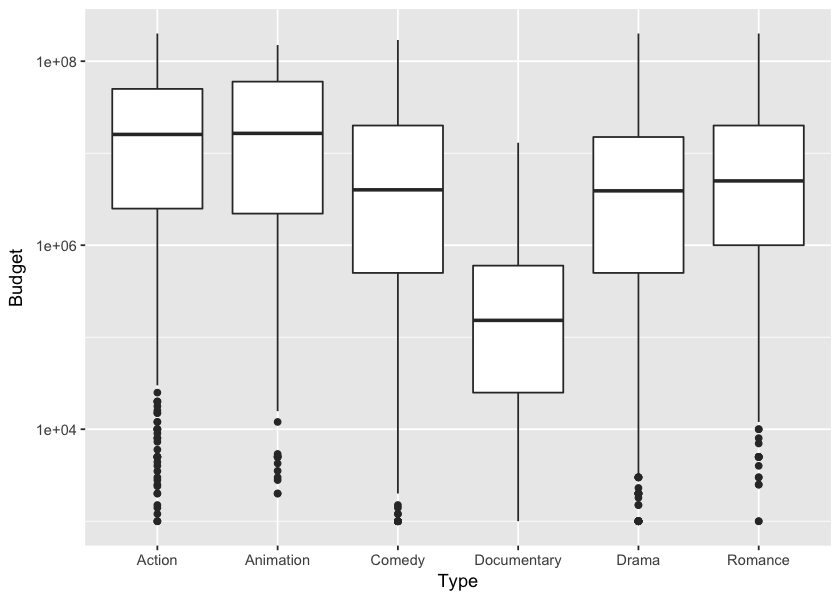

In [79]:
qplot(Type, Budget, data=myMovieData, geom="boxplot", log="y",na.rm=T) 

## Devices

In [80]:
# library(help = "grDevices")

In [83]:
dev.off()
pdf(file = "myplot1.pdf")
barplot(names.arg = student_tab$team_lat, height =student_tab$height )
title(main="Primer 1")
dev.off()

null device 
          1

null device 
          1

In [84]:
dev.off()

null device 
          1

### Решение проблемы с русским текстом -- библиотека векторной графики Cairo

In [85]:
# install.packages("Cairo")


The downloaded binary packages are in
	/var/folders/s8/fvrtb3yj56s741nvlz2dmnyc0000gn/T//RtmpAkjpGi/downloaded_packages


In [86]:
library(Cairo)

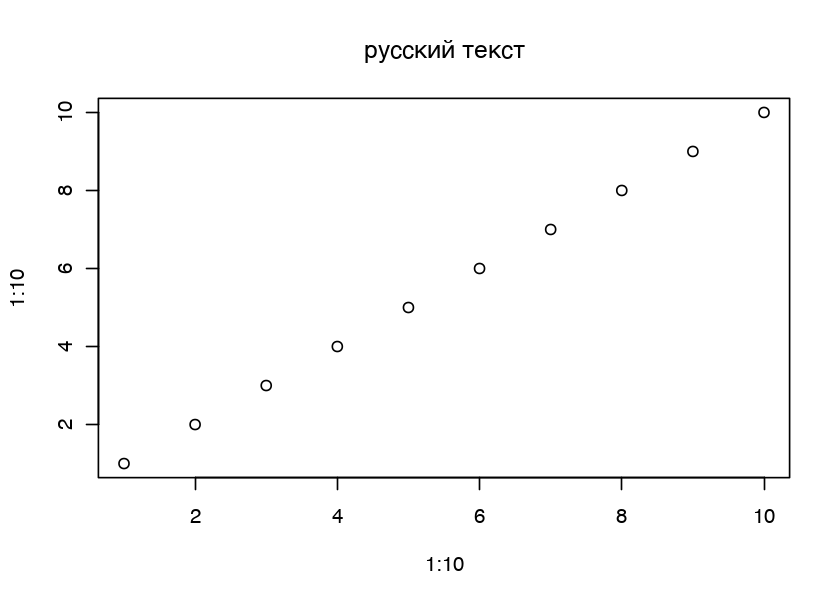

In [87]:
invisible(dev.off())
Cairo(surface="screen",type="SVG",units="mm",dpi=500,file="test.svg")
plot(1:10,1:10,main="русский текст")
invisible(dev.off())

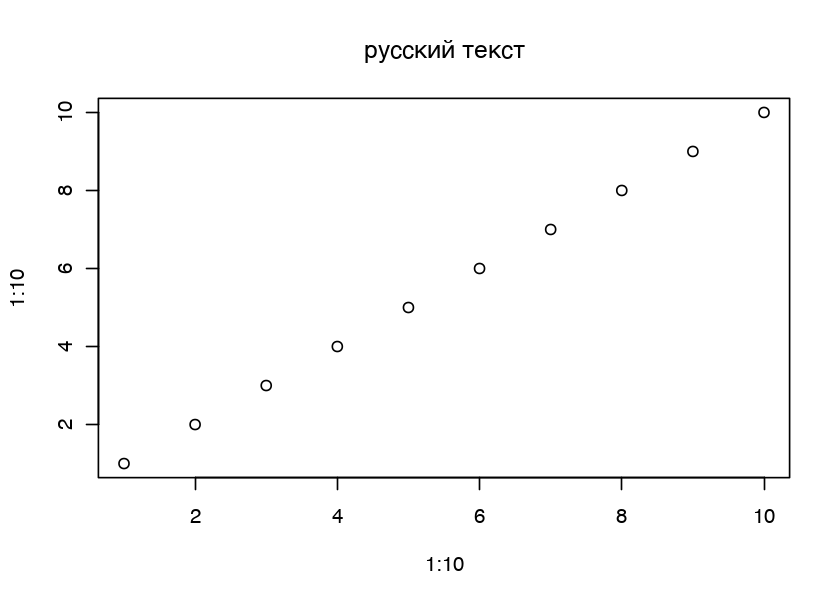

In [88]:
invisible(dev.off())
Cairo(surface="screen",type="PDF",units="mm",dpi=500,file="test.pdf")
plot(1:10,1:10,main="русский текст")
invisible(dev.off())

In [89]:
capabilities()

jpeg         png        tiff       tcltk         X11        aqua 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE 
   http/ftp     sockets      libxml        fifo      cledit       iconv 
       TRUE        TRUE        TRUE        TRUE       FALSE        TRUE 
        NLS     profmem       cairo         ICU long.double     libcurl 
       TRUE        TRUE        TRUE        TRUE        TRUE        TRUE

##  ggplot() + ....

In [90]:
library(repr)

options(repr.plot.width = 6)
options(repr.plot.height = 8)


* * * 

## Примеры из datacamp()


Сравните 3 графика 


```R
# 1 - Map cyl to fill
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl)) +
  geom_point(shape = 1, size = 4)

# 2 - Change shape and alpha of the points in the above plot
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl)) +
  geom_point(shape = 21, size = 4,alpha=0.6)

# 3 - Map am to col in the above plot
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl,col=am)) +
  geom_point(shape = 21, size = 4,alpha=0.6)
```

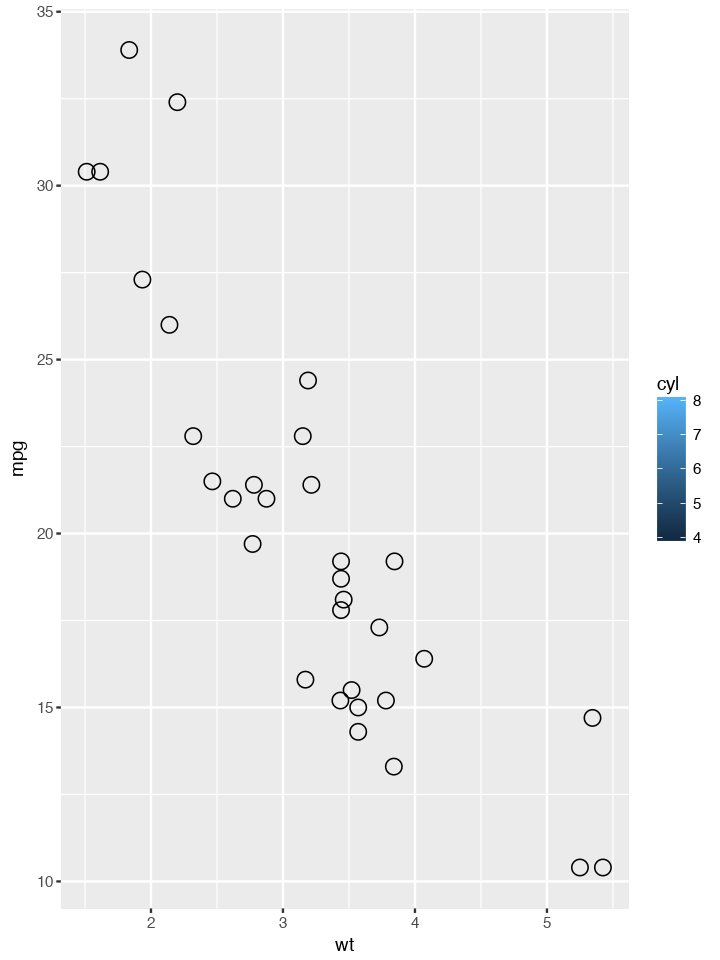

In [93]:
# 1 - Map cyl to fill
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl)) +
  geom_point(shape = 1, size = 4)

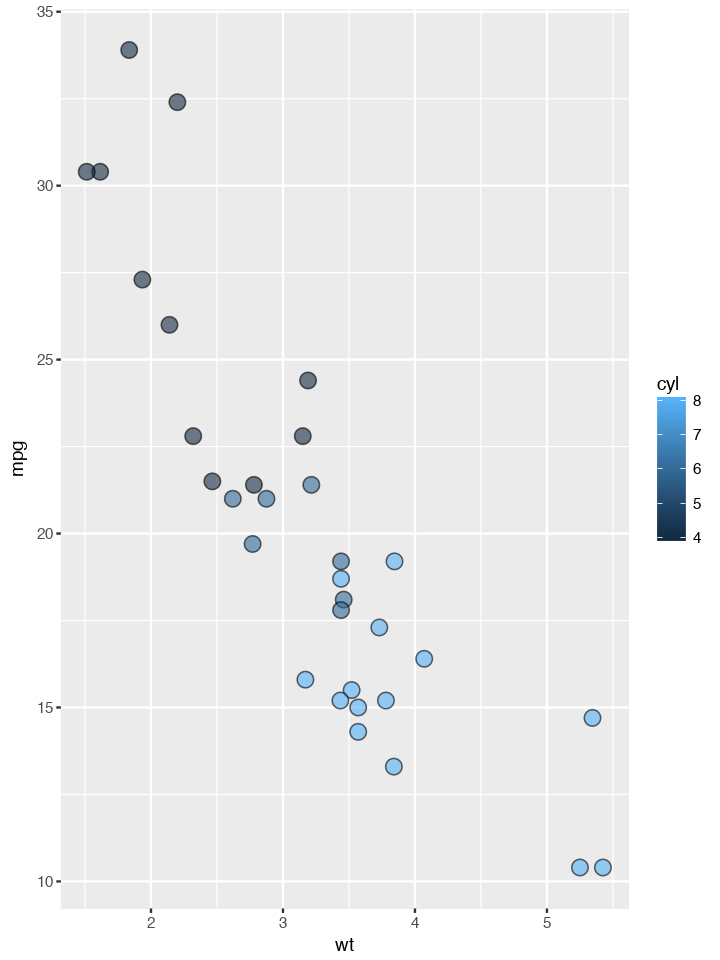

In [94]:
# 2 - Change shape and alpha of the points in the above plot
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl)) +
  geom_point(shape = 21, size = 4,alpha=0.6)

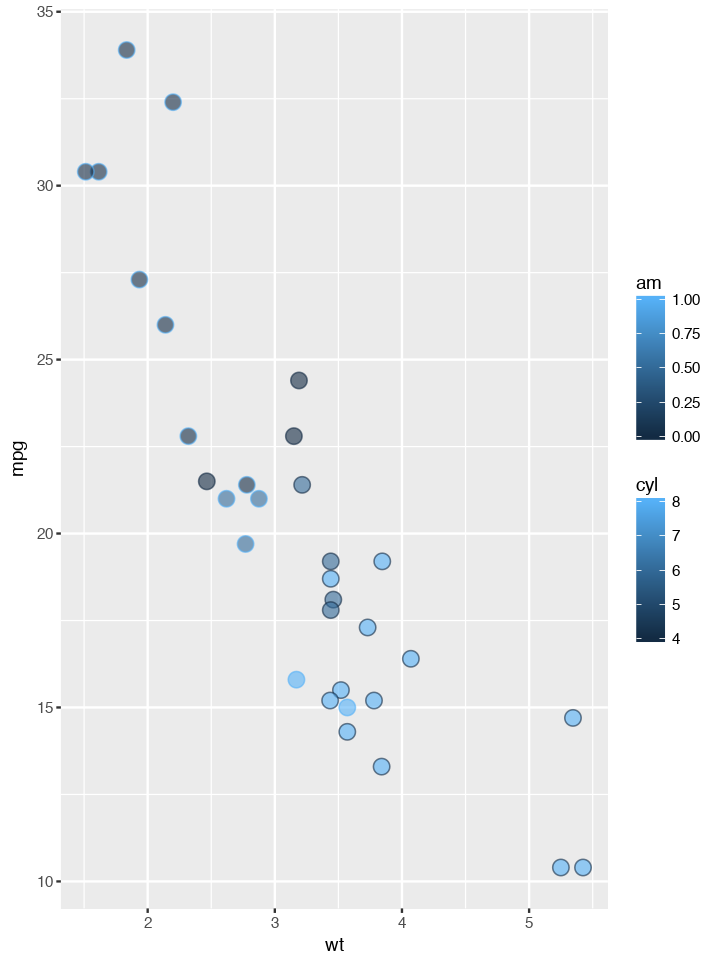

In [95]:
# 3 - Map am to col in the above plot
ggplot(mtcars, aes(x = wt, y = mpg, fill = cyl,col=am)) +
  geom_point(shape = 21, size = 4,alpha=0.6)

В предыдущем графике используются цветовые шкалы с плавным переходом цветов, поскольку не понятно, что величины дискретные 

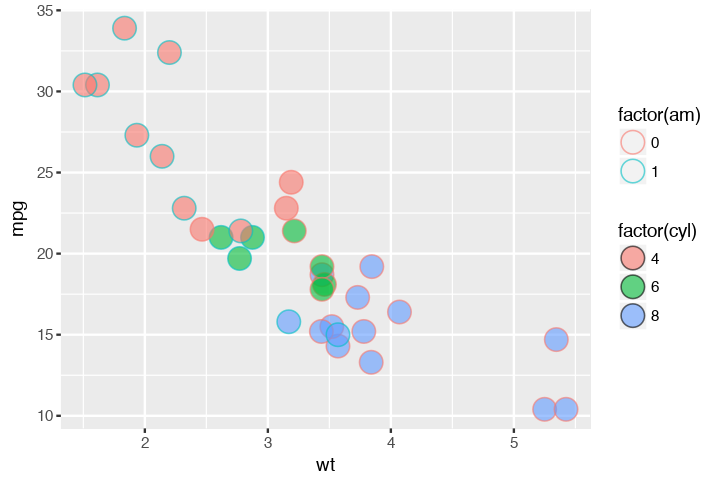

In [199]:
# 4 - Map am to col in the above plot
ggplot(mtcars, aes(x = wt, y = mpg, fill = factor(cyl),col=factor(am))) +
  geom_point(shape = 21, size = 6,alpha=0.6)

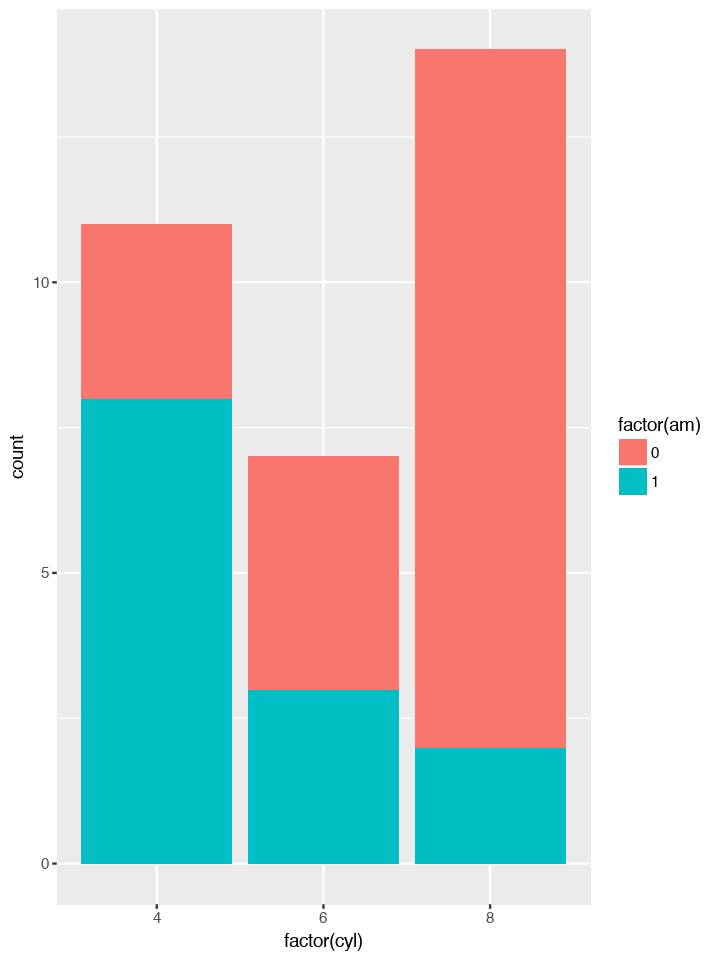

In [97]:
cyl.am <- ggplot(mtcars, aes(x = factor(cyl), fill = factor(am)))

# The base layer, cyl.am, is available for you
# Add geom (position = "stack" by default)
cyl.am + 
  geom_bar()

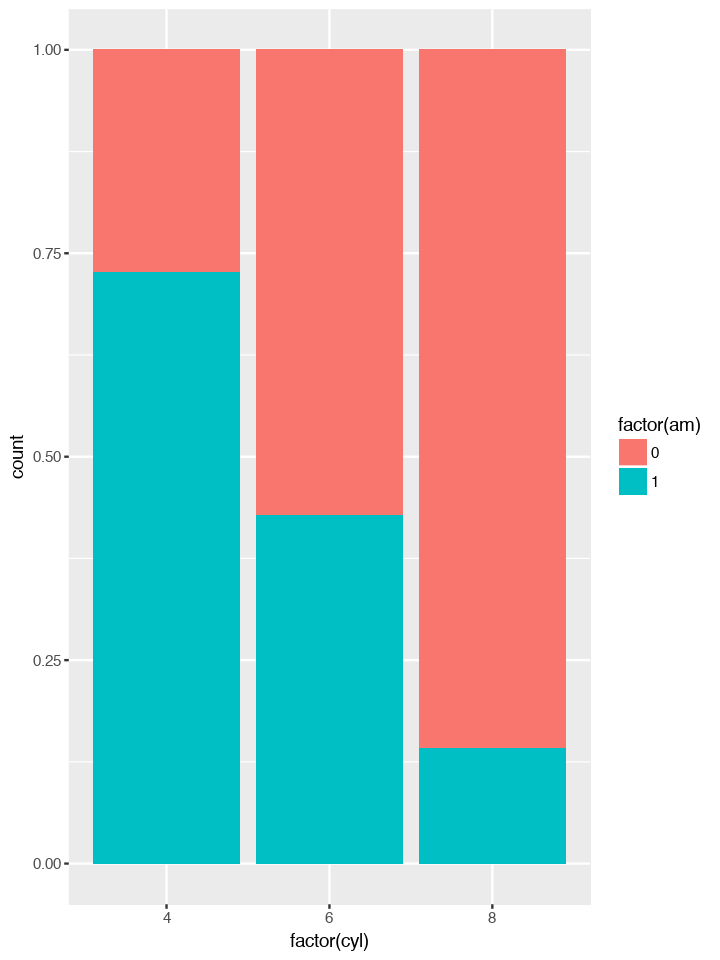

In [98]:
# Fill - show proportion
cyl.am + 
  geom_bar(position = "fill")  

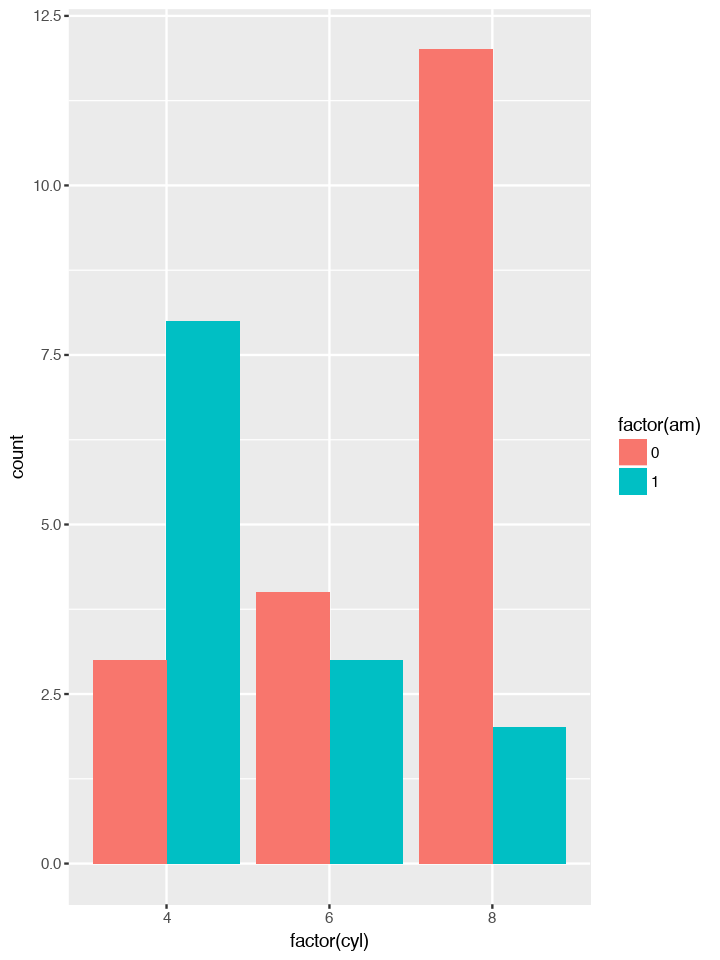

In [99]:
# Dodging - principles of similarity and proximity
cyl.am +
  geom_bar(position = "dodge") 

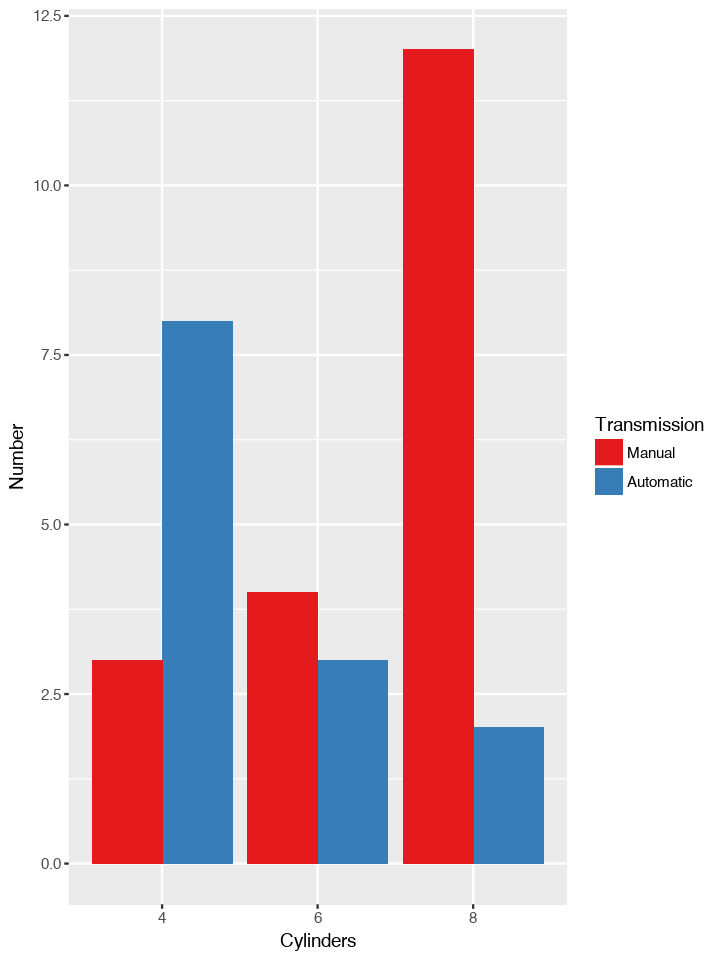

In [100]:
# Clean up the axes with scale_ functions
val = c("#E41A1C", "#377EB8")
lab = c("Manual", "Automatic")
cyl.am +
  geom_bar(position = "dodge") +
  scale_x_discrete("Cylinders") + 
  scale_y_continuous("Number") +
  scale_fill_manual("Transmission", 
                    values = val,
                    labels = lab) 

### Палитры 

* continuos -- плавный переходы цветов
* divergent -- подчеркивающие различия 
* quatative -- для номинальных шкал

См [scale_fill_brewer](https://ggplot2.tidyverse.org/reference/scale_brewer.html)

См [colorbrewer2](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

Можно просматривать различные палитры при помощи `tmaptools::palette_explorer() `

In [167]:
#  install.packages("tmaptools")

In [181]:
# tmaptools::palette_explorer() 

Loading required namespace: shiny
Loading required namespace: shinyjs
Loading required package: shiny
Warning message:
“package ‘shiny’ was built under R version 3.4.4”
Listening on http://127.0.0.1:4103
Warning message in viridis(m, option = pal_nm[i], begin = contrast[1], end = contrast[2]):
“Option 'cividis' does not exist. Defaulting to 'viridis'.”

## Системы координат

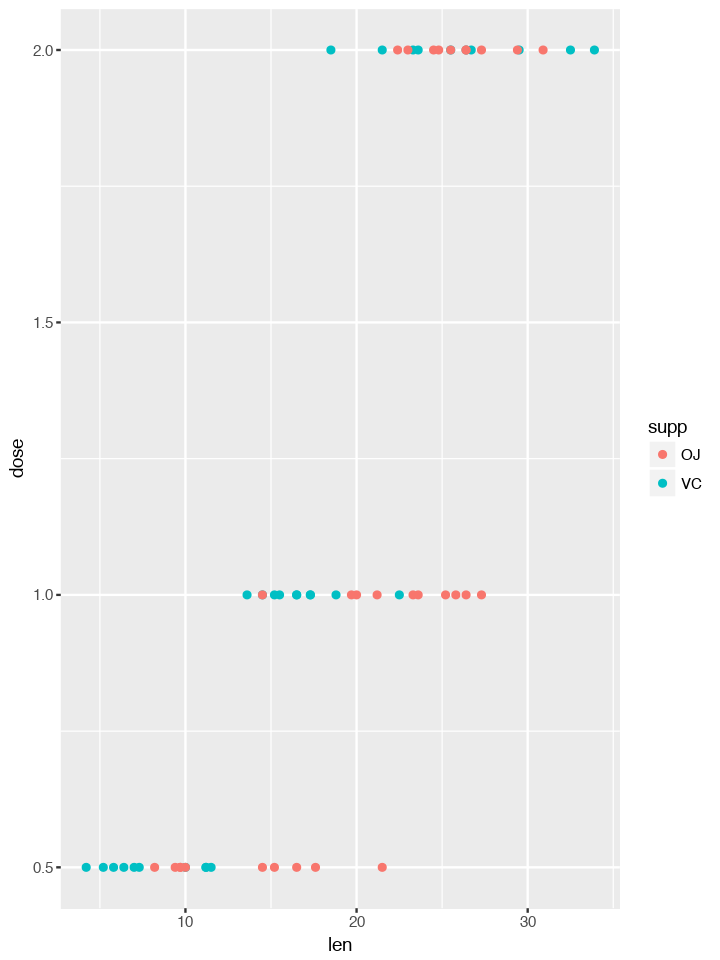

In [101]:
ggplot(data=ToothGrowth, aes(x=dose, y=len, col=supp)) +
geom_point() + coord_flip()

In [102]:
myMovieData$roundYear <- signif(myMovieData$Year, digits = 3)

In [103]:
head(myMovieData$roundYear,15)

[1] 2000 2000 1920 2000 2000 2000 2000 2000 1960 2000 2000 1990 2000 2000 1910

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 16 rows containing non-finite values (stat_bin).”

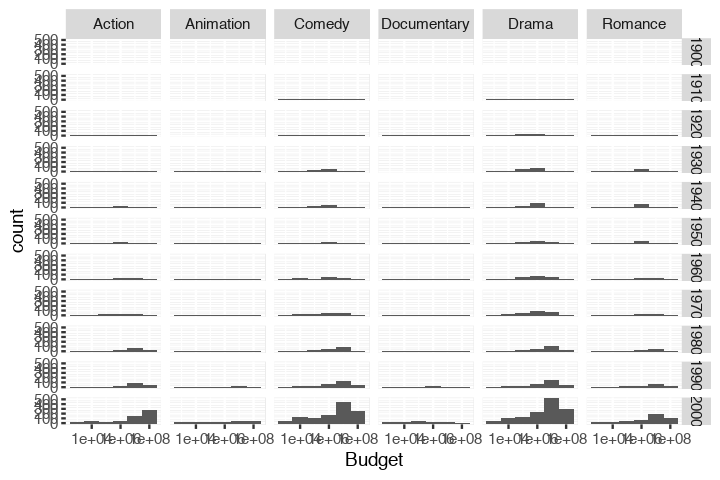

In [213]:
library(dplyr)

myMovieData %>% 
ggplot(aes(Budget)) + geom_histogram(binwidth=1) +
facet_grid(roundYear~Type) + scale_x_log10()

# Функции

In [111]:
myfunc1  <-  function (x) (sin(x)-0.5)^2

In [112]:

# размеры рисунков в Jupyter
library(repr)

options(repr.plot.width = 6)
options(repr.plot.height = 4)


базовая графика

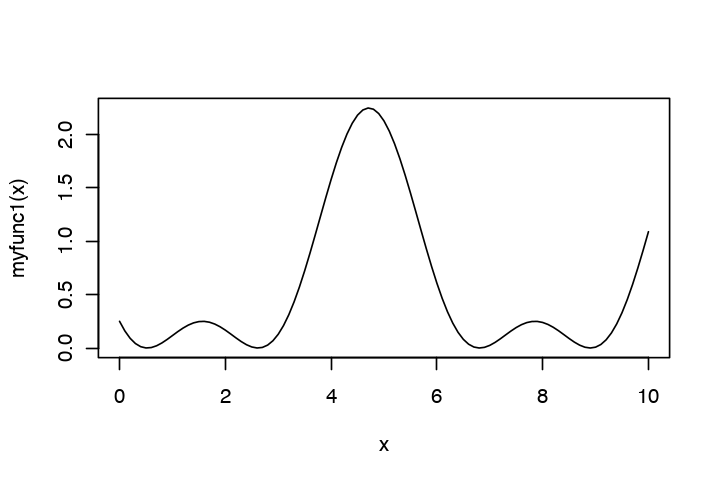

In [113]:
curve(myfunc1(x),from=0,to=10)

#### График функции на отрезке [x1,x2] при помощи ggplot2::stat_function()

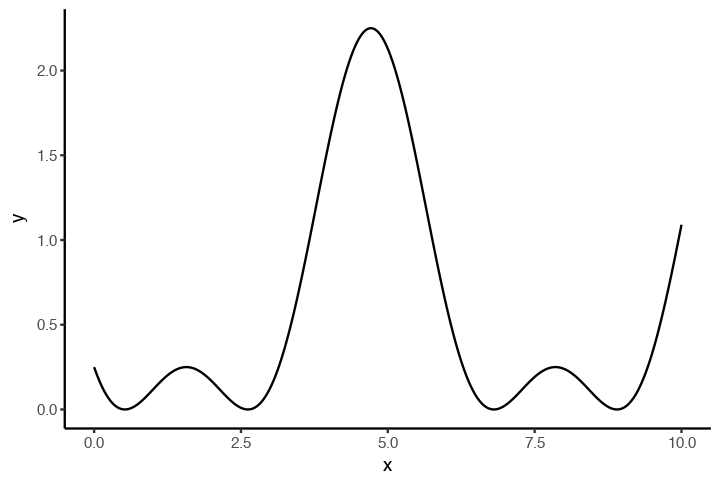

In [114]:
library(ggplot2)
x1 = 0 ; x2 = 10
ggplot(data.frame(x=c(0,10)),mapping=aes(x=x)) +
       stat_function(fun=myfunc1,n = 2000)+theme_classic()

Делаем фунцию, которая будет принимать в качестве параметра другую фунцию или лямбда-выражение.


Выражение функция sin без парамеров передает **ссылку** на объект, содержащий **алгоритм** вычисления функции, а **не вычисляет** эту фукцию. Вызов  и вычисление фунциии происходят уже внутри stat_function() 

In [116]:
my_func_plot0    <-  function(fun,a,b) 
    ggplot(data.frame(x=c(a,b)),mapping=aes(x=x)) +
       stat_function(fun=fun,n = 2000)+theme_bw()

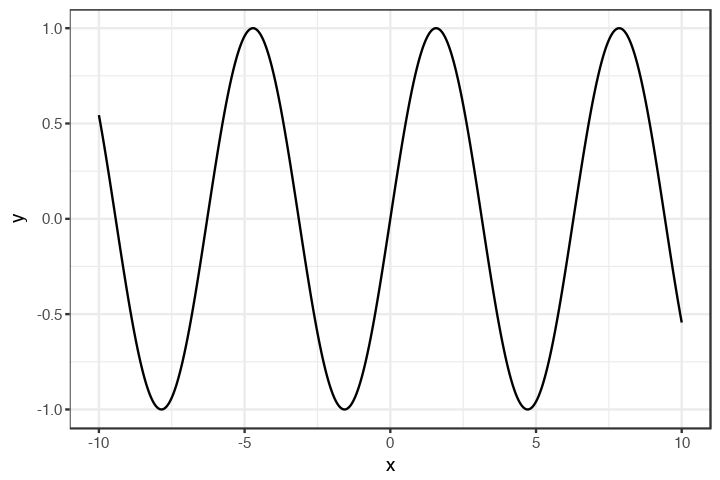

In [117]:
my_func_plot0 (sin,-10,10)

Передаем лямбда-выражение

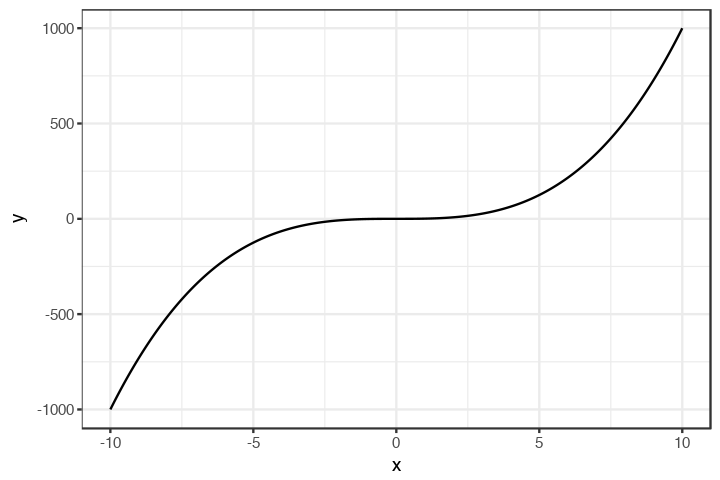

In [119]:
my_func_plot0 (function (x) x^3,-10,10)

В функции, тело которой задано внутри `{ ... }` может быть много выражений. Последние из них вычисляет результат фунции

In [120]:
sq_roots <-  function (a,b,c) {
  D <-  b*b - 4*a*c 
  if (D<0) NA else c( (-b-sqrt(D))/(2*a), (-b+sqrt(D))/(2*a))  # Это результат ф-и
}


In [121]:
sq_roots(1,-5,1)

[1] 0.2087122 4.7912878

In [122]:
sq_roots(1,2,1)

[1] -1 -1

In [123]:
sq_roots(1,-3,5)

[1] NA

In [124]:
myfunc1(pi)  # дает 0

[1] 0.25


### Параметер ...  (ellipsis)}
В нажей функции мы доповляем паратетр `...` для передачи произвольных параметров.
Вместо многоточий можно ставить параметы типа `ключ=значение` и передавать заранее неизвестные (произвольные) параметры в вызываемую в теле нашей функции вспомогательную функцию, которые эти параметры "понимает".

In [130]:
my_func_plot1    <-  function(fun,a,b,...) 
    ggplot(data.frame(x=c(a,b)),mapping=aes(x=x)) +
       stat_function(fun=fun,...)+theme_bw()

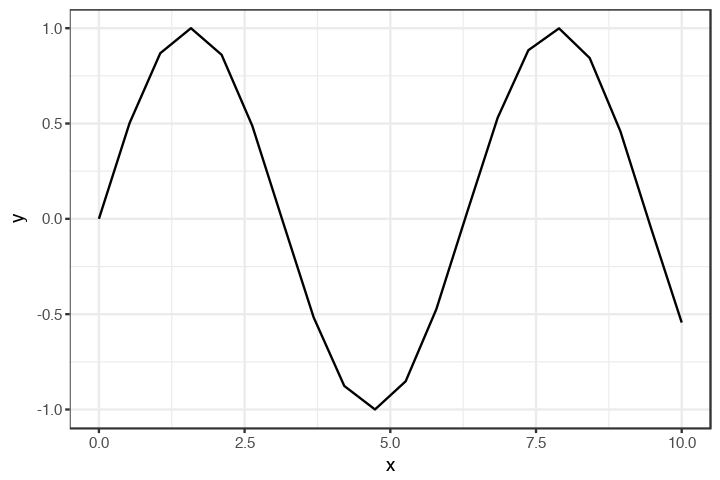

In [133]:
my_func_plot1(sin,0,10,geom = "path",n=20)

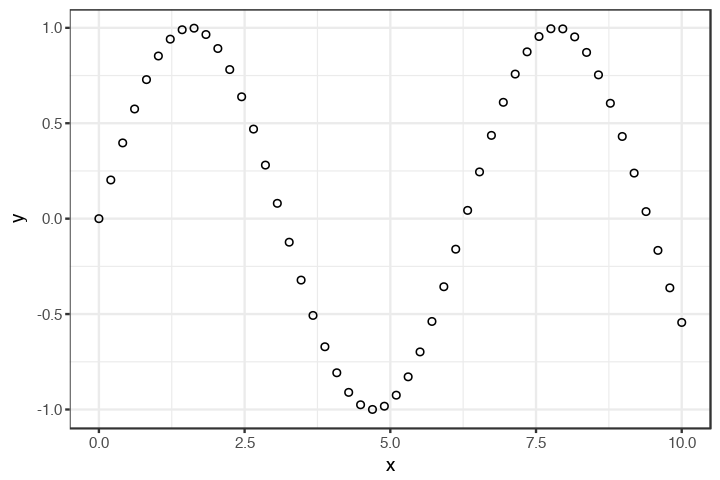

In [134]:
my_func_plot1(sin,0,10,geom = "point",n=50,shape=1)

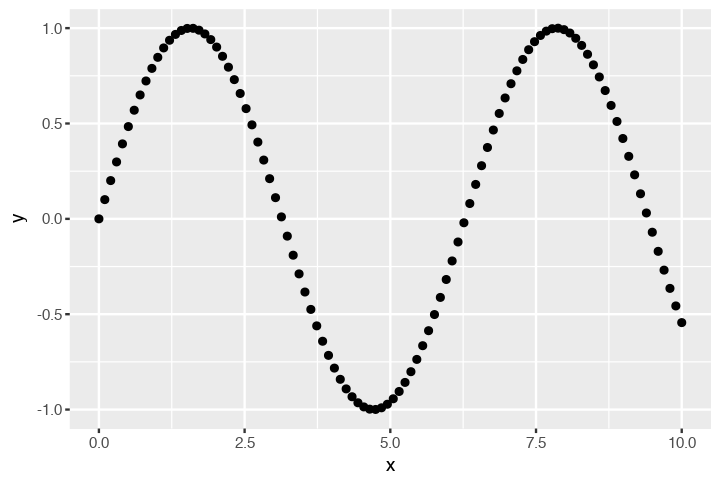

In [138]:
ggplot(data.frame(x=c(0,10)),mapping=aes(x=x),,alpha=0.2) +
       stat_function(fun=sin,geom ="point",n=100)

Значение параметров по умолчанию  

In [139]:
my_func_plot2    <-  function(fun,a,b,n=50,geom="point",shape=11,size=6) 
    ggplot(data.frame(x=c(a,b)),mapping=aes(x=x)) +
       stat_function(fun=fun,geom=geom,shape=shape, n=n,size=size )+theme_classic()

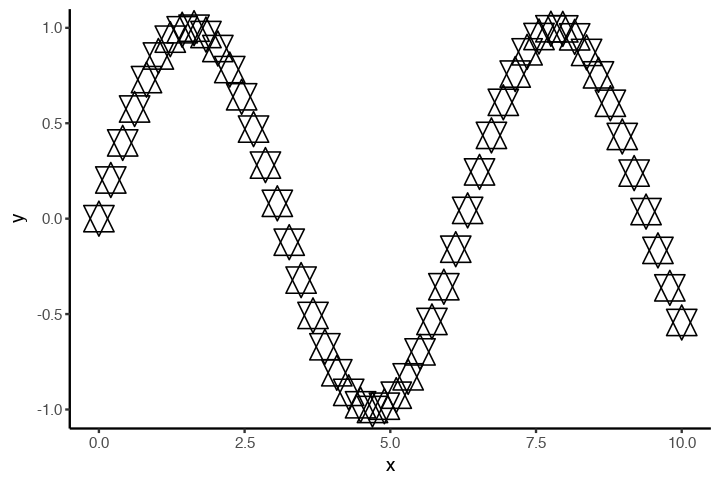

In [140]:
my_func_plot2(sin,0,10)

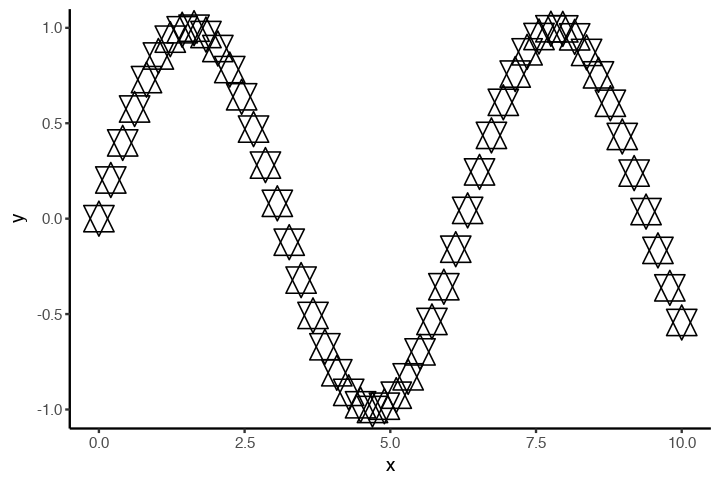

In [141]:
my_func_plot2(sin,0,10)

In [142]:
myfunc1(pi)

[1] 0.25

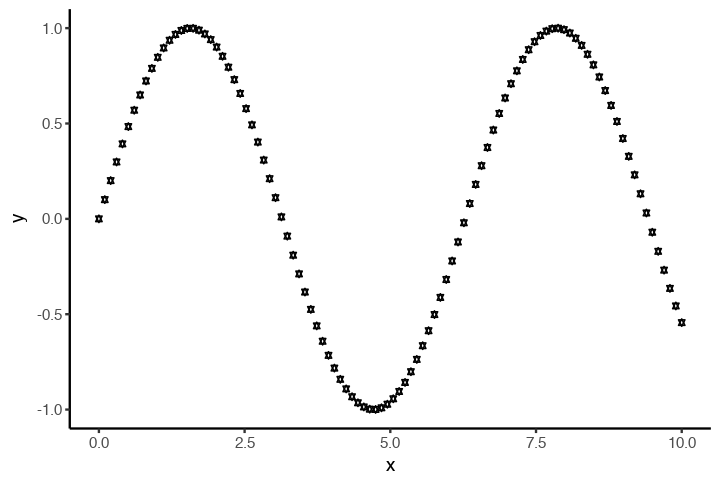

In [143]:
my_func_plot2(sin,0,10,size=1,n=100)

Узнаем аргументы фунций

In [147]:
args(my_func_plot2)

function (fun, a, b, n = 50, geom = "point", shape = 11, size = 6) 
NULL

Узнаем определение фунцкии

In [151]:
my_func_plot2

function(fun,a,b,n=50,geom="point",shape=11,size=6) 
    ggplot(data.frame(x=c(a,b)),mapping=aes(x=x)) +
       stat_function(fun=fun,geom=geom,shape=shape, n=n,size=size )+theme_classic()
<bytecode: 0x7fc37c572780>

In [152]:
complex_func  <-  function (x1,x2) {
    
    mid <- (x1+x2)/2
    curve(myfunc1(x),from=x1,to=x2)
    abline(v=mid,col="red")
    mid
}

[1] 5.5

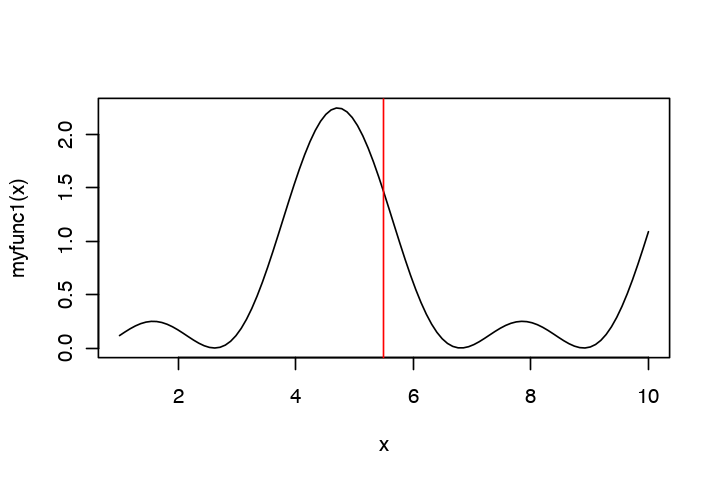

In [153]:
complex_func(1,10)

In [154]:
xvec <- seq(from=0,to=10,length.out = 100)

In [155]:
yvec  <-  myfunc1(xvec)

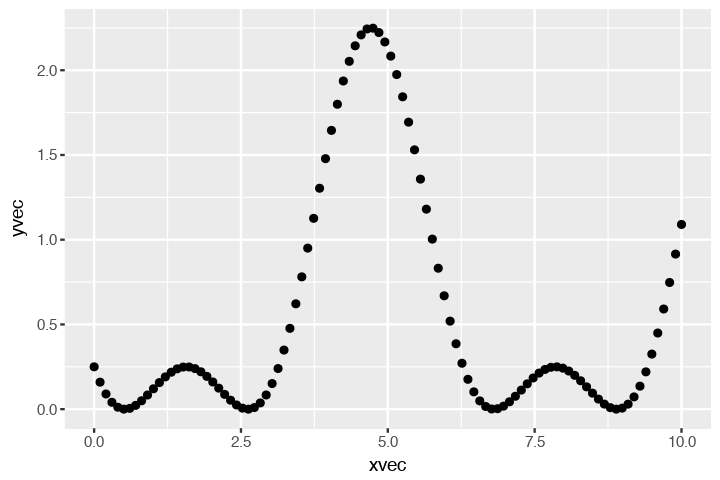

In [156]:
ggplot(tibble(xvec,yvec))+geom_point(aes(x=xvec,y=yvec))

### Функциональное программирование

Пакет purrr.  В названии 3 букввы r !!!


А со списком нужен `map(список,function)`

In [ ]:
library(purrr)


map(список,function) -- выдает  список результатов применения функции к элементам списка и заменяет цикл 

Пример 1: реашем кватратное уравнение с разными наборами коэфициентов

In [175]:
map ( list( c(1,2,1), c(1,5,4), c(1,1,1) ), function (v) sq_roots(v[1],v[2],v[3]) )

[[1]]
[1] -1 -1

[[2]]
[1] -4 -1

[[3]]
[1] NA

В пакете purrr оператор `~функция(.x)` заменяет  лямбда-выражение `function (x) функция(x)` 

In [179]:
map ( list( c(1,2,1), c(1,5,4), c(1,1,1) ), ~sq_roots (.x[1],.x[2],.x[3]) )

[[1]]
[1] -1 -1

[[2]]
[1] -4 -1

[[3]]
[1] NA

Пример 2: Читая список передаём ссылки на функции $\sin x$, $\cos x$ и $|x|$, лежащие в нём в качестве аргумента функции, рисующей график

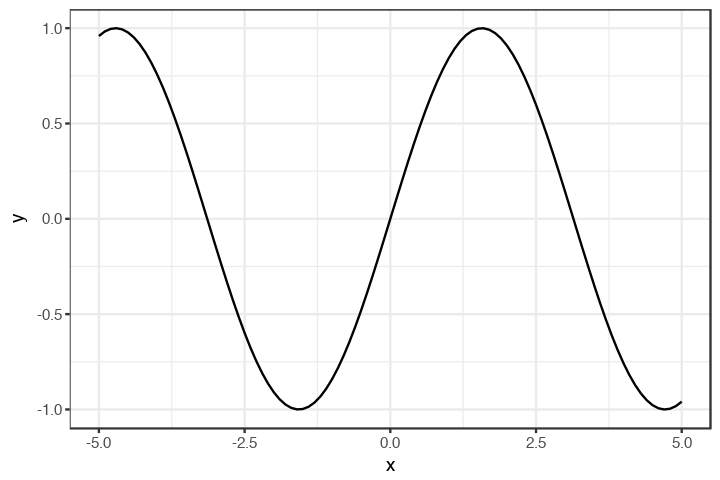

[[1]]

[[2]]

[[3]]


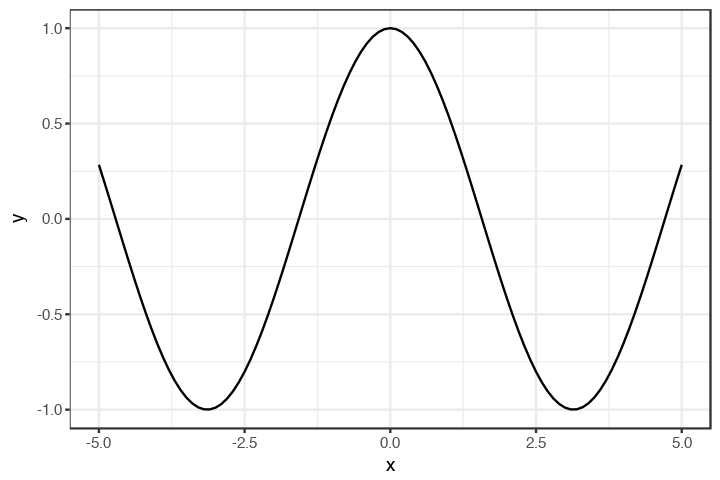

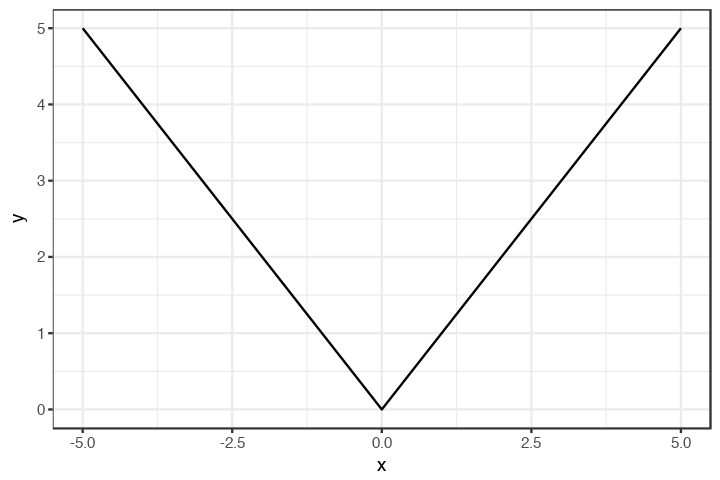

In [163]:
map(list(sin,cos,abs), ~my_func_plot1(.x,-5,5)  )

Пример 2: Читая список передаём ссылки на функции $\sin x$, $\cos x$ и $|x|$, лежащие в нём в качестве аргумента функции, рисующей график

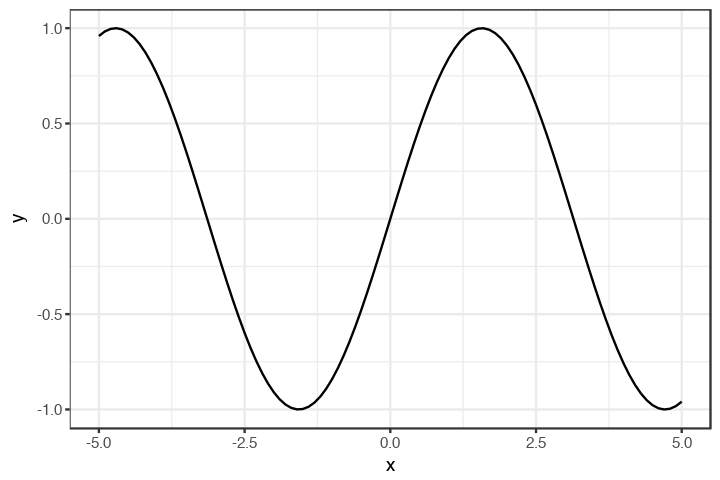

[[1]]

[[2]]

[[3]]


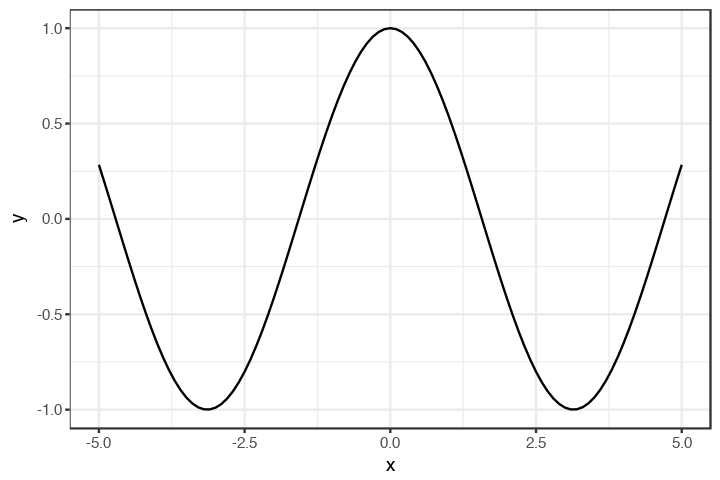

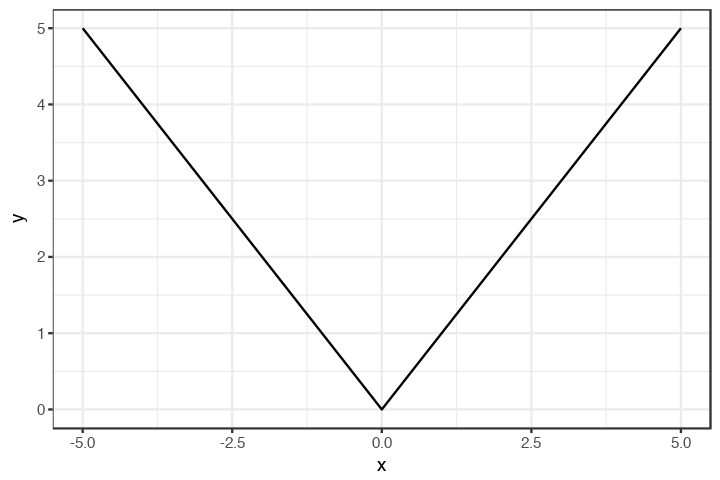

In [163]:
map(list(sin,cos,abs), ~my_func_plot1(.x,-5,5)  )